# Trapezoid vs Gauss quadrature of sqrt(x)

Let us compute
$$
\int_0^1 \sqrt{x} dx
$$

    2     1.6666666667e-01   0.0000e+00     7.2206720124e-03   0.0000e+00
    4     3.5384383294e-02   4.7102e+00     1.1609787082e-03   6.2195e+00
    8     1.0374676944e-02   3.4106e+00     1.6891343351e-04   6.8732e+00
   16     3.3932245922e-03   3.0575e+00     2.2964832819e-05   7.3553e+00
   32     1.1610774091e-03   2.9225e+00     3.0007011895e-06   7.6532e+00
   64     4.0523537954e-04   2.8652e+00     3.8373151734e-07   7.8198e+00
  128     1.4266799811e-04   2.8404e+00     4.8523810858e-08   7.9081e+00
  256     5.0411536176e-05   2.8301e+00     6.1008637031e-09   7.9536e+00
  512     1.7837193144e-05   2.8262e+00     7.6484252265e-10   7.9766e+00
 1024     6.3136745539e-06   2.8252e+00     9.5747521023e-11   7.9881e+00


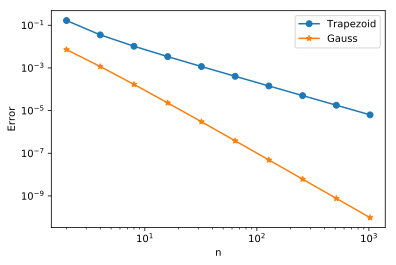

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from scipy.integrate import fixed_quad,trapz
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.sqrt(x)
a,b = 0.0,1.0
qe = 2.0/3.0 # Exact integral

n,N = 2,10
e1,e2,nodes = np.zeros(N),np.zeros(N),np.zeros(N)
for i in range(N):
    x = np.linspace(a,b,n)
    val = trapz(f(x),dx=(b-a)/(n-1))
    e1[i] = np.abs(val - qe)
    val = fixed_quad(f,a,b,n=n)
    nodes[i] = n
    e2[i] = np.abs(val[0]-qe)
    if i>0:
        print('%5d %20.10e %12.4e %20.10e %12.4e' % 
              (n,e1[i],e1[i-1]/e1[i],e2[i],e2[i-1]/e2[i]))
    else:
        print('%5d %20.10e %12.4e %20.10e %12.4e' % 
              (n,e1[i],0,e2[i],0))
    n = 2*n

plt.figure()
plt.loglog(nodes,e1,'o-')
plt.loglog(nodes,e2,'*-')
plt.legend(('Trapezoid','Gauss'))
plt.xlabel('n')
plt.ylabel('Error');

Trapezoid is converging at rate $1/n^{1.5}$ (note that $2^{1.5} = 2.825$) and Gauss at rate $1/n^3$